In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

data = pd.DataFrame({'ds': date_rng, 'y': prices})

Доминирующая частота (период) в данных: 78.36 дней


C:\Users\Skiv2\AppData\Local\Temp\ipykernel_38016\3726665425.py:5: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / fft_freq  # Преобразование частоты в период


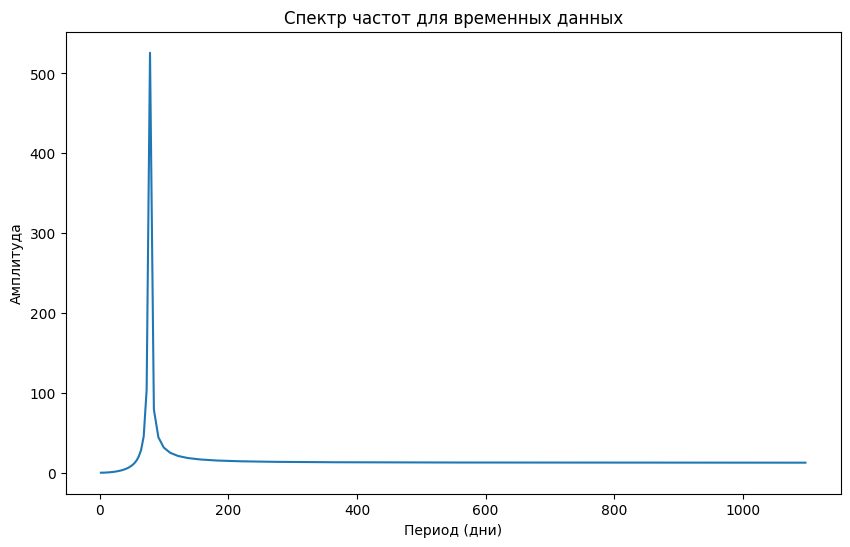

In [3]:
# Выполните преобразование Фурье
fft_result = np.fft.fft(prices)
fft_freq = np.fft.fftfreq(len(prices))
magnitude = np.abs(fft_result)
periods = 1 / fft_freq  # Преобразование частоты в период

# Отбросьте отрицательные частоты и нулевую частоту
positive_mask = fft_freq > 0
fft_freq = fft_freq[positive_mask]
magnitude = magnitude[positive_mask]
periods = periods[positive_mask]

# Найдите наиболее значимую частоту
max_frequency_index = np.argmax(magnitude)
dominant_period = periods[max_frequency_index]

# Выведите результаты
print(f"Доминирующая частота (период) в данных: {dominant_period:.2f} дней")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(periods, magnitude)
plt.xlabel("Период (дни)")
plt.ylabel("Амплитуда")
plt.title("Спектр частот для временных данных")
plt.show()

In [4]:
prices_diff = np.diff(prices)

In [5]:
len(prices)

1097

In [6]:
len(prices_diff)

1096

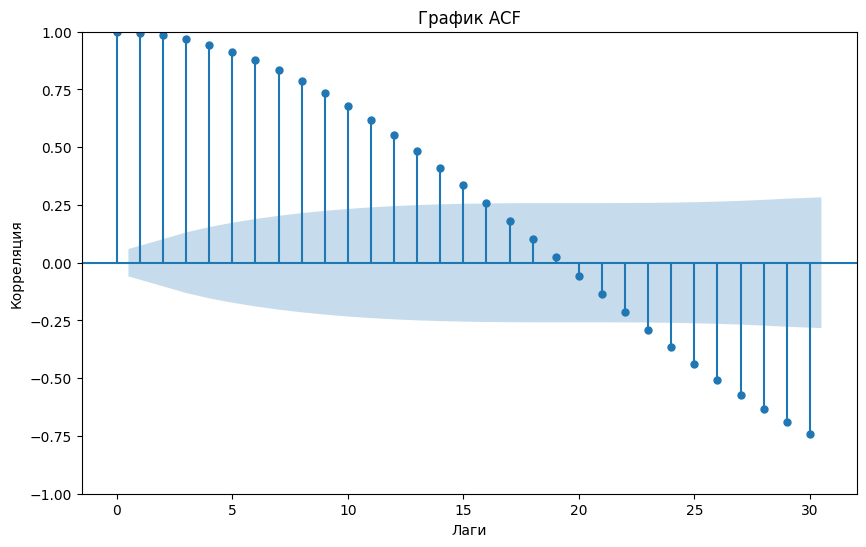

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


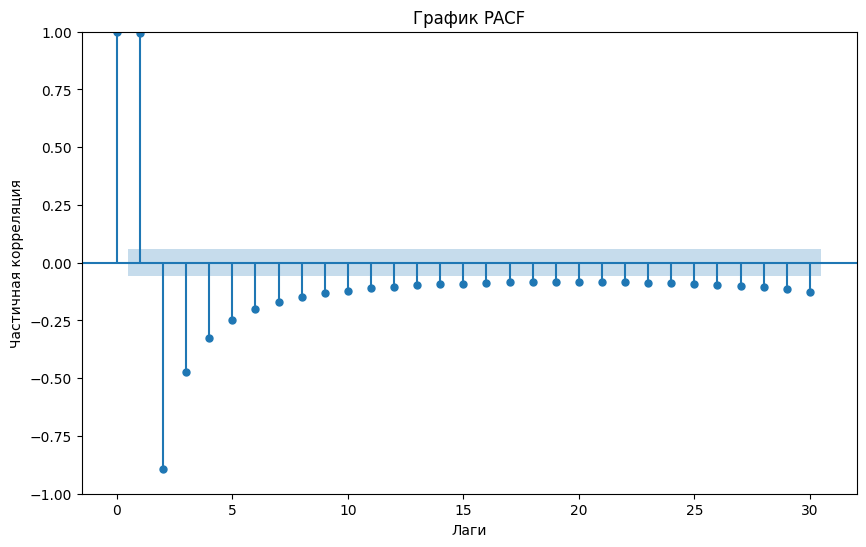

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(prices, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(prices, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.6590239738327134e+16
p-value: 0.0


In [9]:
train_size = int(len(prices) * 0.7)
test_size = len(prices) - train_size

In [10]:
model_data = pd.DataFrame({'Price': prices[0:train_size], 'Date': date_rng[1:train_size + 1]})
model_data = model_data.set_index('Date', inplace = False)
model_data.head(10)

,Price
Date,
2019-01-02,-0.885371
2019-01-03,-0.920145
2019-01-04,-0.948861
2019-01-05,-0.971331
2019-01-06,-0.987407
2019-01-07,-0.996982
2019-01-08,-0.999994
2019-01-09,-0.996423
2019-01-10,-0.986292


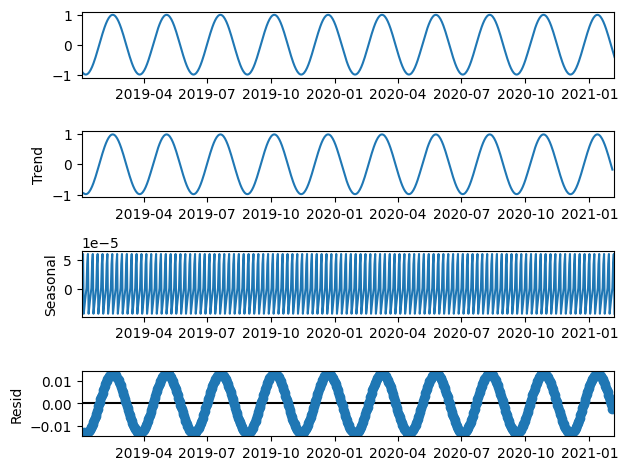

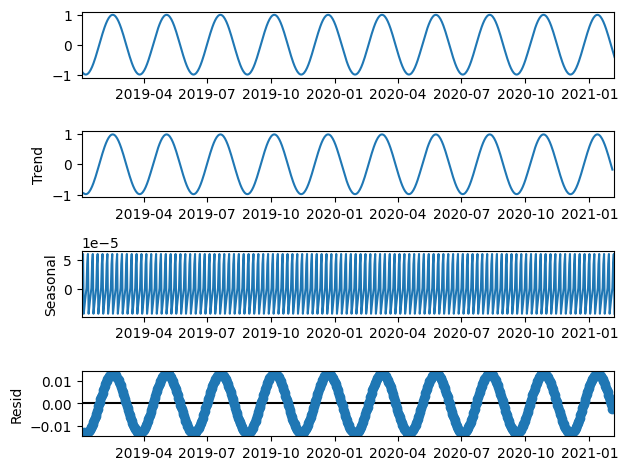

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(model_data, model = "add")
a.plot()

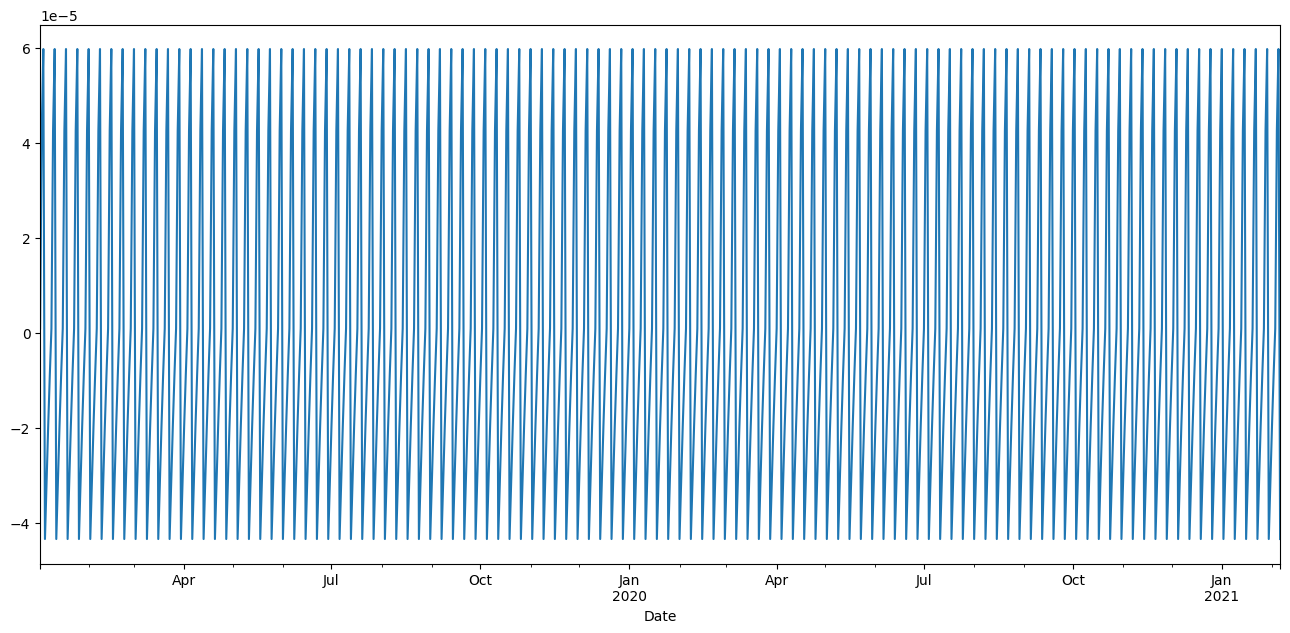

In [12]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [13]:
# Выполните декомпозицию временного ряда для определения тренда и остатков
result = seasonal_decompose(model_data, period=78)

# Определите сезонный порядок на основе результатов декомпозиции
seasonal_order = (result.seasonal[0], result.seasonal[1], result.seasonal[2], 78)

In [14]:
seasonal_order

(-0.9741552534060719, -0.9908172403102775, -1.0009869328053678, 78)

In [32]:
#Importing the module
import pmdarima as pmd

arima_model = pmd.auto_arima(model_data["Price"], seasonal=True, seasonal_order=seasonal_order,
                              m=12, max_p = 7, max_d = 5, max_q = 7, max_P = 4, max_D = 4, max_Q = 4,
                              test = "adf", supress_warnings = True,
                              trace = True)

#Summary of the model
arima_model.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1854: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,3,1)[12]             : AIC=338126985.384, Time=31.82 sec
 ARIMA(0,0,0)(0,3,0)[12]             : AIC=-1663.441, Time=0.40 sec
 ARIMA(1,0,0)(1,3,0)[12]             : AIC=inf, Time=4.34 sec
 ARIMA(0,0,1)(0,3,1)[12]             : AIC=inf, Time=7.56 sec
 ARIMA(0,0,0)(1,3,0)[12]             : AIC=-1942.732, Time=2.59 sec
 ARIMA(0,0,0)(2,3,0)[12]             : AIC=inf, Time=9.66 sec
 ARIMA(0,0,0)(1,3,1)[12]             : AIC=338127157.127, Time=15.52 sec
 ARIMA(0,0,0)(0,3,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,0,0)(2,3,1)[12]             : AIC=-7753.398, Time=4.62 sec
 ARIMA(0,0,0)(3,3,1)[12]             : AIC=-7580.615, Time=70.90 sec
 ARIMA(0,0,0)(2,3,2)[12]             : AIC=inf, Time=14.40 sec
 ARIMA(0,0,0)(1,3,2)[12]             : AIC=inf, Time=10.95 sec
 ARIMA(0,0,0)(3,3,0)[12]             : AIC=inf, Time=93.80 sec
 ARIMA(0,0,0)(3,3,2)[12]             : AIC=inf, Time=167.25 sec
 ARIMA(1,0,0)(2,3,1)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  767
Model:             SARIMAX(1, 0, 1)x(2, 3, 1, 12)   Log Likelihood                5716.540
Date:                            Wed, 16 Aug 2023   AIC                         -11421.080
Time:                                    15:51:25   BIC                         -11393.514
Sample:                                01-02-2019   HQIC                        -11410.446
                                     - 02-06-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9975      0.000   3439.143      0.000       0.997       0.998
ma.L1       1.903e-06   3.01e-06      0.632      0.528      -4e-06    7.81e-06
ar.S.L12       1.1230   1.29e-05    8.7e+04      0.000       1.123       1.123
ar.S.L24      -0.9956      0.000  -3482.313      0.000      -0.996      -0.995
ma.S.L12    1.078e-06    2.3e-06      0.468      0.640   -3.44e-06    5.59e-06
sigma2      4.725e-09   3.36e-10     14.079      0.000    4.07e-09    5.38e-09
===================================================================================
Ljung-Box (L1) (Q):                 333.54   Jarque-Bera (JB):             93385.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.38e+20. Standard errors may be unstable.
"""

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(model_data["Price"], order = (1,0,1), seasonal_order = (2,3,1,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  767
Model:             SARIMAX(1, 0, 1)x(2, 3, 1, 12)   Log Likelihood                5716.540
Date:                            Thu, 17 Aug 2023   AIC                         -11421.080
Time:                                    10:29:50   BIC                         -11393.514
Sample:                                01-02-2019   HQIC                        -11410.446
                                     - 02-06-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9975      0.000   3439.143      0.000       0.997       0.998
ma.L1       1.903e-06   3.01e-06      0.632      0.528      -4e-06    7.81e-06
ar.S.L12       1.1230   1.29e-05    8.7e+04      0.000       1.123       1.123
ar.S.L24      -0.9956      0.000  -3482.313      0.000      -0.996      -0.995
ma.S.L12    1.078e-06    2.3e-06      0.468      0.640   -3.44e-06    5.59e-06
sigma2      4.725e-09   3.36e-10     14.079      0.000    4.07e-09    5.38e-09
===================================================================================
Ljung-Box (L1) (Q):                 333.54   Jarque-Bera (JB):             93385.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.38e+20. Standard errors may be unstable.
"""

In [36]:
arima_pred = arima_result.predict(start = len(model_data), end = len(prices)-1, typ="levels")
arima_pred

2021-02-07   -0.069372
2021-02-08   -0.065721
2021-02-09   -0.061634
2021-02-10   -0.057139
2021-02-11   -0.052266
                ...   
2021-12-29    1.166735
2021-12-30    1.183044
2021-12-31    1.199228
2022-01-01    1.215159
2022-01-02    1.230714
Freq: D, Name: predicted_mean, Length: 330, dtype: float64

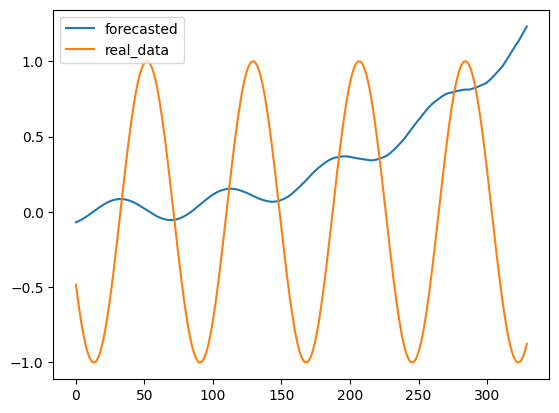

In [37]:
plt.plot(arima_pred.values, label = "forecasted")
plt.plot(prices[train_size:], label = "real_data")
plt.legend()

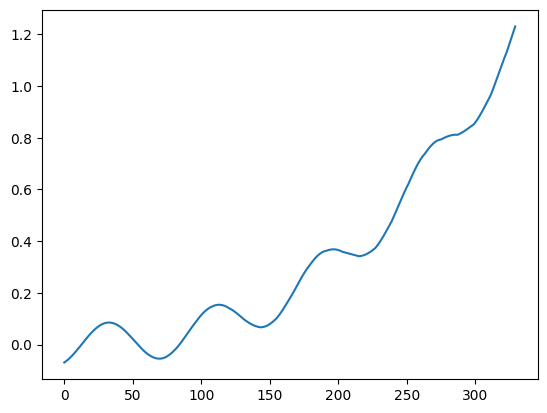

In [39]:
plt.plot(arima_pred.values, label = "forecasted")

In [15]:
#Importing the module
import pmdarima as pmd

arima_model = pmd.auto_arima(model_data["Price"], seasonal=True, seasonal_order=seasonal_order,
                              m=78, max_p = 7, max_d = 5, max_q = 7, max_P = 4, max_D = 4, max_Q = 4,
                              test = "adf", supress_warnings = True,
                              trace = True)

#Summary of the model
arima_model.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1854: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[78] intercept   : AIC=inf, Time=280.11 sec
 ARIMA(0,0,0)(0,0,0)[78] intercept   : AIC=1649.355, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[78] intercept   : AIC=inf, Time=80.52 sec
 ARIMA(0,0,1)(0,0,1)[78] intercept   : AIC=inf, Time=78.11 sec
 ARIMA(0,0,0)(0,0,0)[78]             : AIC=1647.417, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[78] intercept   : AIC=inf, Time=55.28 sec
 ARIMA(0,0,0)(0,0,1)[78] intercept   : AIC=inf, Time=50.65 sec
 ARIMA(0,0,0)(1,0,1)[78] intercept   : AIC=inf, Time=108.83 sec
 ARIMA(1,0,0)(0,0,0)[78] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[78] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[78] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[78]          
Total fit time: 654.007 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  767
Model:                        SARIMAX   Log Likelihood                -822.708
Date:                Thu, 17 Aug 2023   AIC                           1647.417
Time:                        11:12:47   BIC                           1652.059
Sample:                    01-02-2019   HQIC                          1649.204
                         - 02-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5003      0.051      9.822      0.000       0.400       0.600
===================================================================================
Ljung-Box (L1) (Q):                 763.02   Jarque-Bera (JB):                71.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.02
Prob(H) (two-sided):                  0.67   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(model_data["Price"], order = (1,0,1), seasonal_order = (0,0,0,78))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  767
Model:               SARIMAX(1, 0, 1)   Log Likelihood                1628.756
Date:                Thu, 17 Aug 2023   AIC                          -3251.513
Time:                        11:28:57   BIC                          -3237.586
Sample:                    01-02-2019   HQIC                         -3246.152
                         - 02-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9967      0.004    255.253      0.000       0.989       1.004
ma.L1          1.0000    256.772      0.004      0.997    -502.263     504.263
sigma2         0.0008      0.211      0.004      0.997      -0.413       0.415
===================================================================================
Ljung-Box (L1) (Q):                 761.07   Jarque-Bera (JB):                71.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.02
Prob(H) (two-sided):                  0.71   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
arima_pred = arima_result.predict(start = len(model_data), end = len(prices)-1, typ="levels")
arima_pred

2021-02-07   -0.446963
2021-02-08   -0.445470
2021-02-09   -0.443981
2021-02-10   -0.442498
2021-02-11   -0.441020
                ...   
2021-12-29   -0.150649
2021-12-30   -0.150146
2021-12-31   -0.149644
2022-01-01   -0.149144
2022-01-02   -0.148646
Freq: D, Name: predicted_mean, Length: 330, dtype: float64

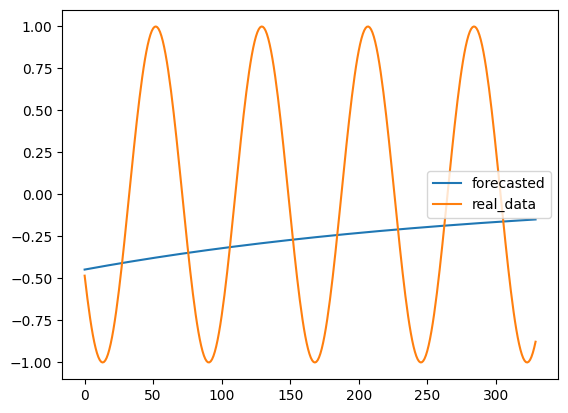

In [27]:
plt.plot(arima_pred.values, label = "forecasted")
plt.plot(prices[train_size:], label = "real_data")
plt.legend()